In [14]:
from scipy import stats
import numpy as np
import seaborn as sns
from pandas import DataFrame
from matplotlib import pyplot as plt

## 문제1)

In [151]:
score = {'언어영역' : [392, 404, 346, 382, 368, 449, 391],
        '수리영역' : [428, 518, 376, 426, 409, 490, 448]}

corr,p_value = stats.pearsonr(score['언어영역'], score['수리영역'])
print("corr: {0}, p_value: {1}".format(corr, p_value))

corr: 0.8210642074423062, p_value: 0.023563708235834223


In [152]:
score = DataFrame(score)

In [153]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["axes.unicode_minus"] = False

          수학        물리        음악
수학  1.000000  0.991806  0.155094
물리  0.991806  1.000000  0.116224
음악  0.155094  0.116224  1.000000


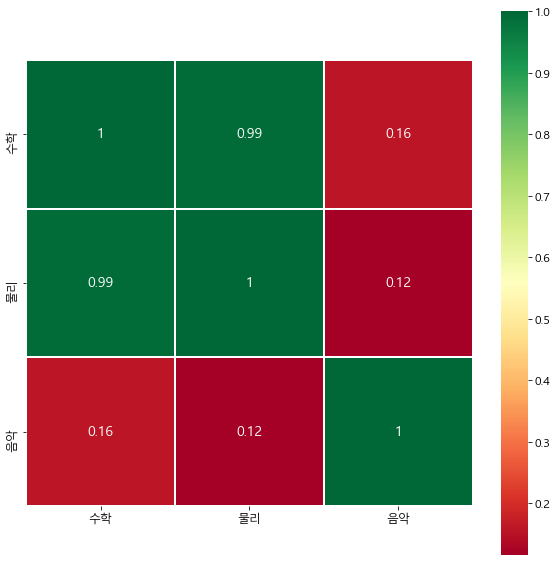

In [190]:
corr = score.corr()

print(corr)
ax = sns.heatmap(corr,
                square = True,
                cmap='RdYlGn',
                linewidth = 0.1,
                linecolor = 'white',
                annot = True,
                annot_kws={'size' : 14})

plt.show()

Text(0.5, 1.0, '언어, 수리영역 관계')

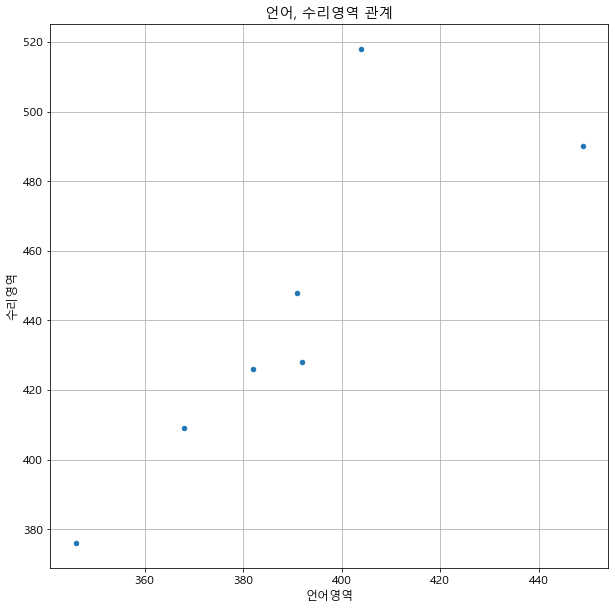

In [155]:
score.plot.scatter('언어영역','수리영역')
plt.grid()
plt.title('언어, 수리영역 관계')

## 문제2)

In [156]:
score = DataFrame({'학생번호' : [1,2,3,4,5,6,7,8,9,10],
                  '수학' : [66,64,48,46,78,60,90,50,66,70],
                  '물리' : [70,68,46,48,84,64,92,52,68,72],
                  '음악' : [80,70,88,66,76,86,84,74,60,78]}).set_index('학생번호')

score

,수학,물리,음악
학생번호,,,
1,66,70,80
2,64,68,70
3,48,46,88
4,46,48,66
5,78,84,76
6,60,64,86
7,90,92,84
8,50,52,74
9,66,68,60


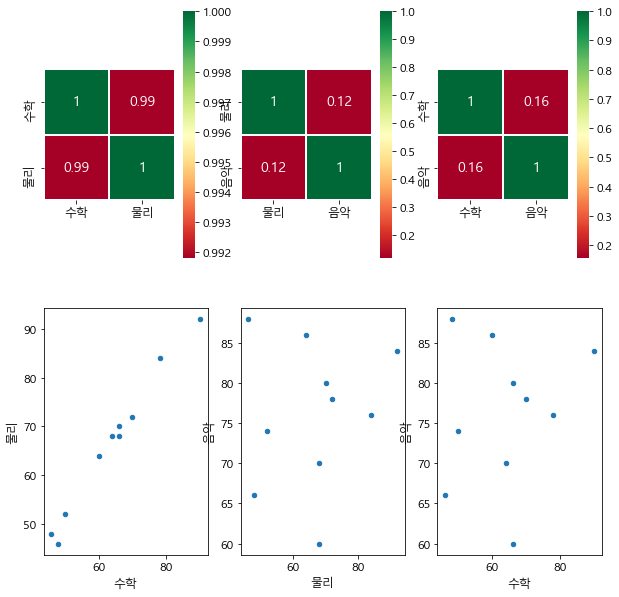

In [157]:
fig, ax = plt.subplots(2,3)

corr_list = [score.filter(['수학', '물리']).corr(), score.filter(['물리', '음악']).corr(), score.filter(['수학', '음악']).corr()]

for i in range(0, len(corr_list)):
    sns.heatmap(corr_list[i],
                ax = ax[0][i],
                square = True,
                cmap='RdYlGn',
                linewidth = 0.1,
                linecolor = 'white',
                annot = True,
                annot_kws={'size' : 14})
for i in range(0, len(corr_list)):
    keys = list(corr_list[i].index)
    
    score.plot.scatter(x = keys[0], y = keys[1], ax = ax[1][i])

## 문제3)

In [158]:
df = DataFrame({'홈런수' : [174, 163, 161, 230, 214, 194, 187, 167, 190, 196, 199, 173, 213, 172],
               '평균타율' : [0.277, 0.276, 0.272, 0.272, 0.269, 0.266, 0.263, 0.262, 0.262, 0.261, 0.259, 0.258, 0.257, 0.252]})

df

,홈런수,평균타율
0,174,0.277
1,163,0.276
2,161,0.272
3,230,0.272
4,214,0.269
5,194,0.266
6,187,0.263
7,167,0.262
8,190,0.262
9,196,0.261


In [159]:
corr, pvalue = stats.pearsonr(df['홈런수'], df['평균타율'])
print('상관계수: {0}, pvalue: {1}'.format(corr,pvalue))

상관계수: -0.07469493488185412, pvalue: 0.7996661879546081


<AxesSubplot:xlabel='홈런수', ylabel='평균타율'>

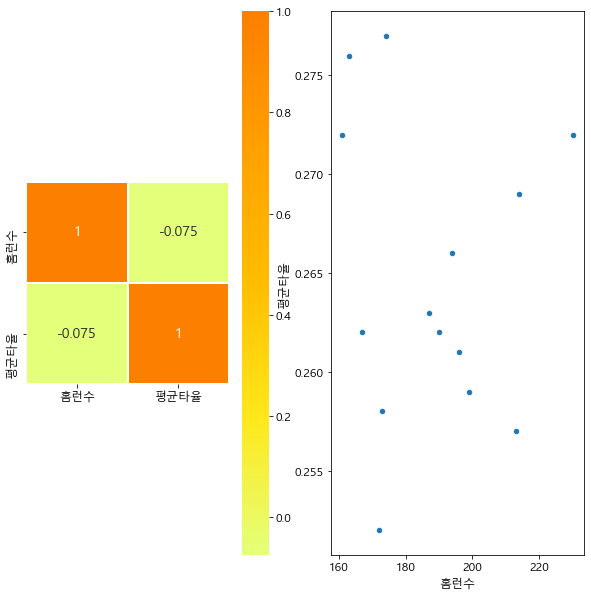

In [160]:
corr = df.corr()

fig,ax = plt.subplots(1,2)

sns.heatmap(corr,
            ax = ax[0],
            square = True,
            cmap='Wistia',
            linewidth = 0.1,
            linecolor = 'white',
            annot = True,
            annot_kws={'size' : 14})

df.plot.scatter(x = '홈런수', y = '평균타율',ax = ax[1])

- 상관계수가 -0.075로 거의 상관이 없다.

## 문제4)

<AxesSubplot:xlabel='x', ylabel='y'>

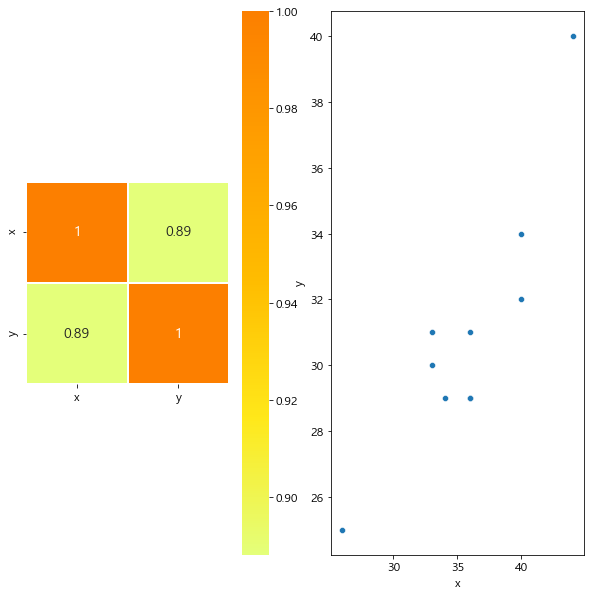

In [161]:
df = DataFrame({'x' : [36, 40, 34, 44, 33, 36, 40, 33, 26, 36],
               'y' : [29, 32, 29, 40, 31, 29, 34, 30, 25, 31]})

corr = df.corr()

fig,ax = plt.subplots(1,2)

sns.heatmap(corr,
                ax = ax[0],
                square = True,
                cmap='Wistia',
                linewidth = 0.1,
                linecolor = 'white',
                annot = True,
                annot_kws={'size' : 14})

sns.scatterplot(x='x', y='y', data=df, ax = ax[1])

- 상관계수가 0.89로 꽤 높은 양의 상관관계가 있다.

## 문제5-1)

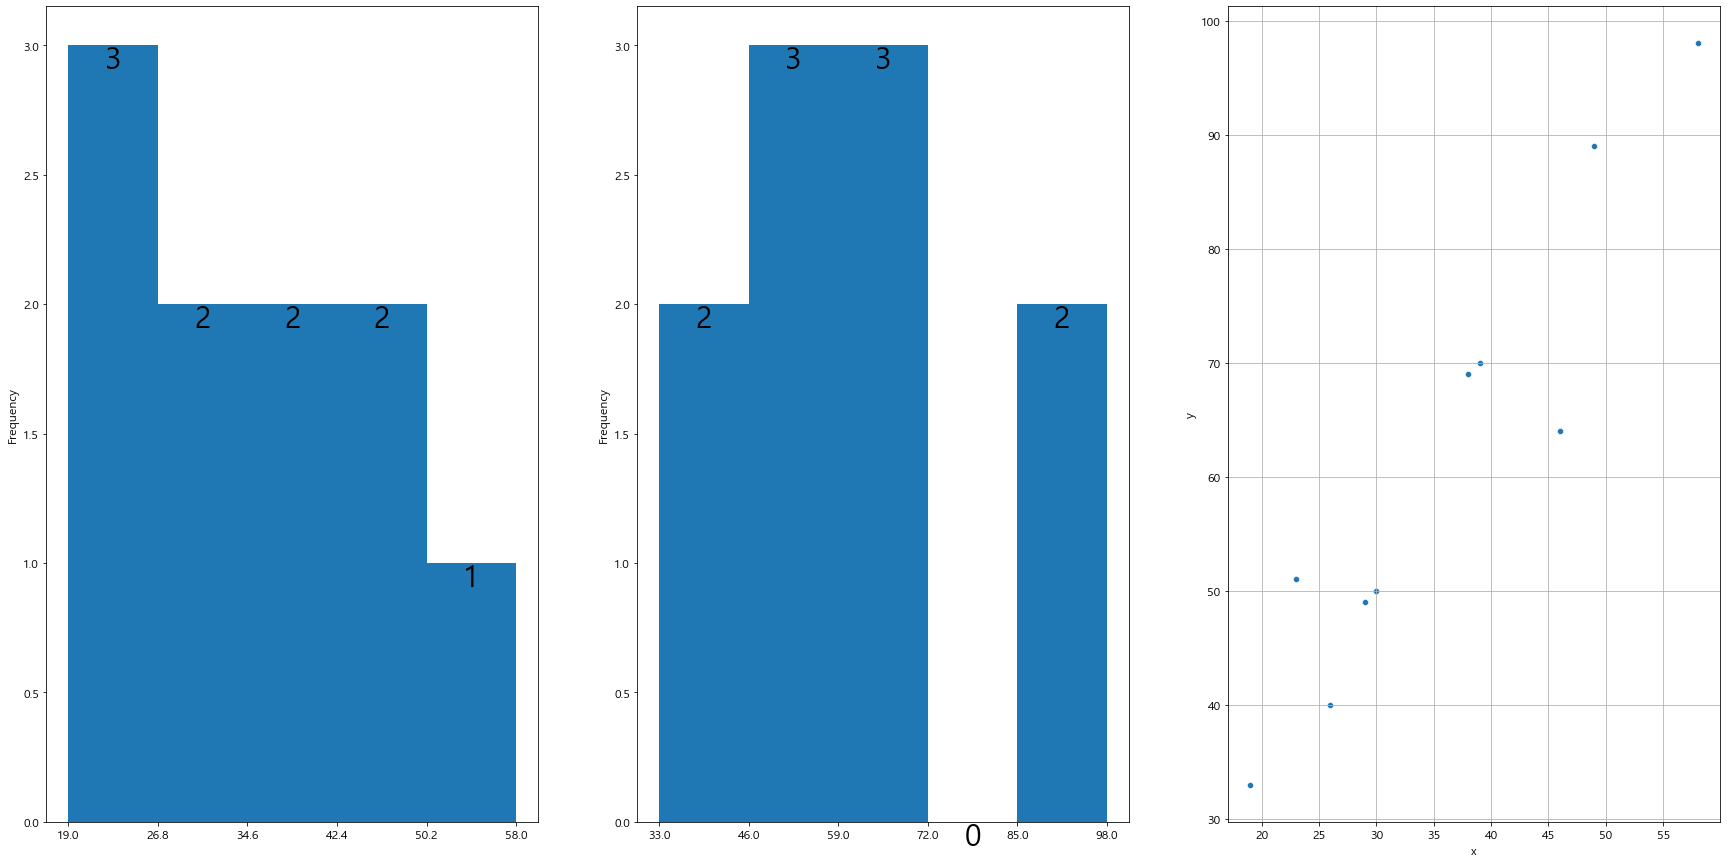

In [180]:
df = DataFrame({'x' : [19, 23, 26, 29, 30, 38, 39, 46, 49, 58],
               'y' : [33, 51, 40, 49, 50, 69, 70, 64, 89, 98]})

fig,ax = plt.subplots(1,3, figsize = (30,15))

n_x, bins_x = np.histogram(df['x'], bins=5, range=(df['x'].min(), df['x'].max()))
n_y, bins_y = np.histogram(df['y'], bins=5, range=(df['y'].min(), df['y'].max()))

df['x'].plot.hist(ax = ax[0], bins = 5, range = (df['x'].min(), df['x'].max()))

ax[0].set_xticks(bins_x)
ax[0].set_xticklabels(bins_x)

# 출력할 데이터 수 만큼 반복
for i, w in enumerate(n_x):    
    x = bins_x[i] + ((bins_x[i+1]-bins_x[i]) / 2)
    
     #텍스트 출력 -> x좌표, y좌표, 내용, 글자크기, 색상, 텍스트가로정렬, 세로정렬
    ax[0].text(x, w, w, fontsize=30, color='#000000', horizontalalignment='center', verticalalignment='top')
    
df['y'].plot.hist(ax = ax[1], bins = 5, range = (df['y'].min(), df['y'].max()))

ax[1].set_xticks(bins_y)
ax[1].set_xticklabels(bins_y)

# 출력할 데이터 수 만큼 반복
for i, w in enumerate(n_y):    
    x = bins_y[i] + ((bins_y[i+1]-bins_y[i]) / 2)
    
     #텍스트 출력 -> x좌표, y좌표, 내용, 글자크기, 색상, 텍스트가로정렬, 세로정렬
    ax[1].text(x, w, w, fontsize=30, color='#000000', horizontalalignment='center', verticalalignment='top')
    
    
sns.scatterplot(x='x', y='y', data=df, ax = ax[2])
ax[2].grid()

## 문제5-2)

In [181]:
# 대립가설 예약대수와 판매대수의 평균에 차이가 있다.
# 귀무가설 예약대수와 판매대수는 같다.

tTestResult = stats.ttest_ind(df['x'], df['y'])
tTestResult

# 귀무가설을 기각한다. 예약대수와 판매대수의 평균에 차이가 있다.

Ttest_indResult(statistic=-3.334657806571363, pvalue=0.0036879105056452813)

## 문제5-3)

In [182]:
corr, pvalue = stats.pearsonr(df['x'], df['y'])
print('상관계수: {0}, pvalue: {1}'.format(corr,pvalue))

# 상관계수가 0.95 정도로 상당한 양의 상관관계가 있다.

상관계수: 0.9469131855513355, pvalue: 3.258261740140739e-05


Text(19, 88, '판매대수 = 1.575101 x 예약대수 + 5.068887')

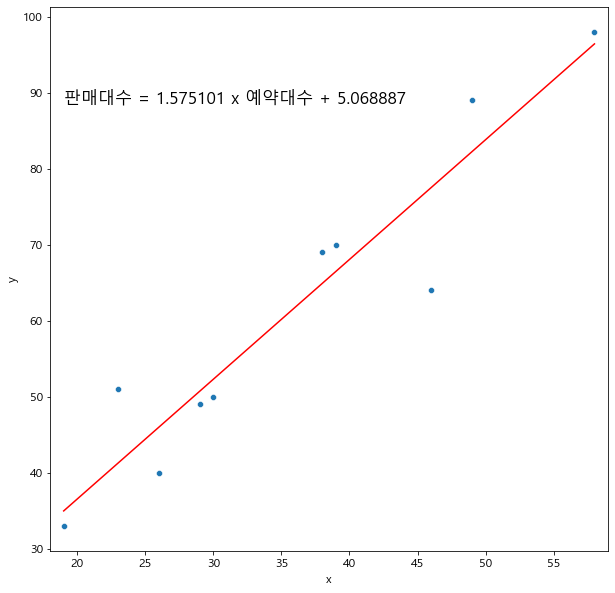

In [183]:
plt.figure()

z = np.polyfit(df['x'], df['y'] , 1)
a, b = z
f = np.poly1d(z)

sns.scatterplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'],f(df['x']),'#ff0000')
plt.xlim(df['x'].min()-1, df['x'].max()+1)

plt.text(df['x'].min(), df['y'].max()-10,
        '판매대수 = %f x 예약대수 + %f' %(a,b),
        fontsize = 17, color = 'black', 
         horizontalalignment='left', verticalalignment='bottom')

## 문제5-4)

In [184]:
from statsmodels.formula.api import ols
import scipy

In [185]:
res = ols('y ~ x', data=df).fit()
res.summary()

c:\users\junhong\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.40
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           3.26e-05
Time:                        12:13:26   Log-Likelihood:                -32.667
No. Observations:                  10   AIC:                             69.33
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0689      7.113      0.713      0.496     -11.333      21.471
x              1.5751      0.189      8.331      0.000       1.139       2.011
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   2.910
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.497
Skew:                          -0.541   Prob(JB):                        0.780
Kurtosis:                       2.849   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`판매대수` 에 대하여 `예약대수`로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다.
$F(1,8) = 69.40, p < 0.05$


`예약대수` 의 회귀계수는 1.5751로, 판매대수에 대하여 유의미한 예측변인인 것으로 타나났다. 
$t(8) = 8.331, p < 0.05$


## 문제5-5)

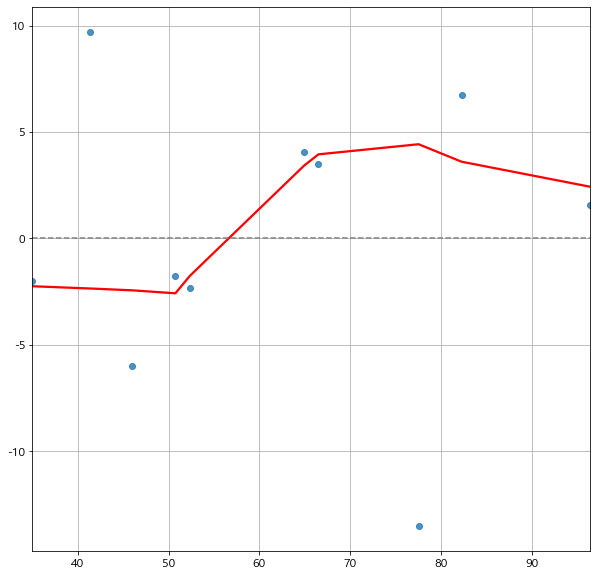

In [112]:
# 모형의 선형성

fitted = res.predict(df)

residual = df['y'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.grid()
plt.show()



어느정도 선형을 띔

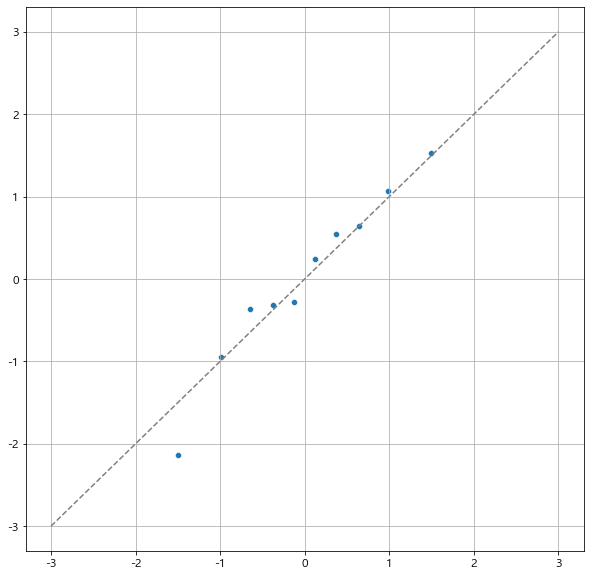

In [186]:
# Q-Q plot

sr = scipy.stats.zscore(residual)
(x, y), fig = scipy.stats.probplot(sr)
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], linestyle='--', color='grey')
plt.grid()

plt.show()

점들이 점선을 따라 배치되어 있으므로 정규분포를 따름

In [187]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9645063281059265, pvalue=0.835770308971405)

유의 수준 5%에서 잔차의 정규성을 충족한다.

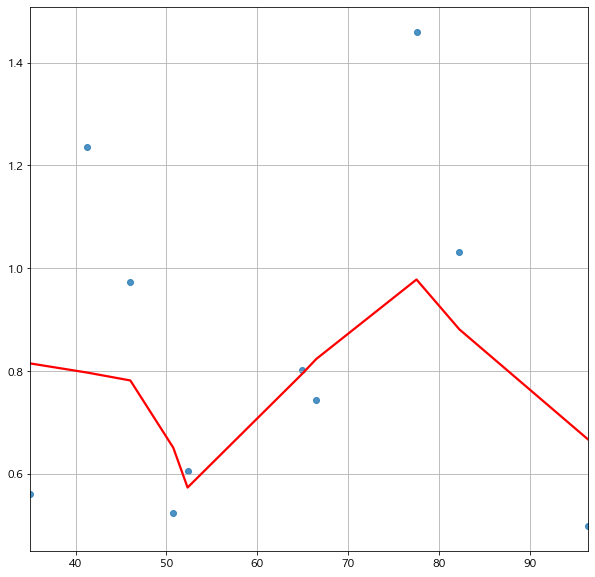

In [117]:
#등분산성 검정

sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.grid()
plt.show()

## 문제5-6)

In [188]:
a = res.params.x
b = res.params.Intercept
print('y = %fx + %f' %(a,b))

y = 1.575101x + 5.068887


Text(19, 88, '판매대수 = 1.575101 x 예약대수 + 5.068887')

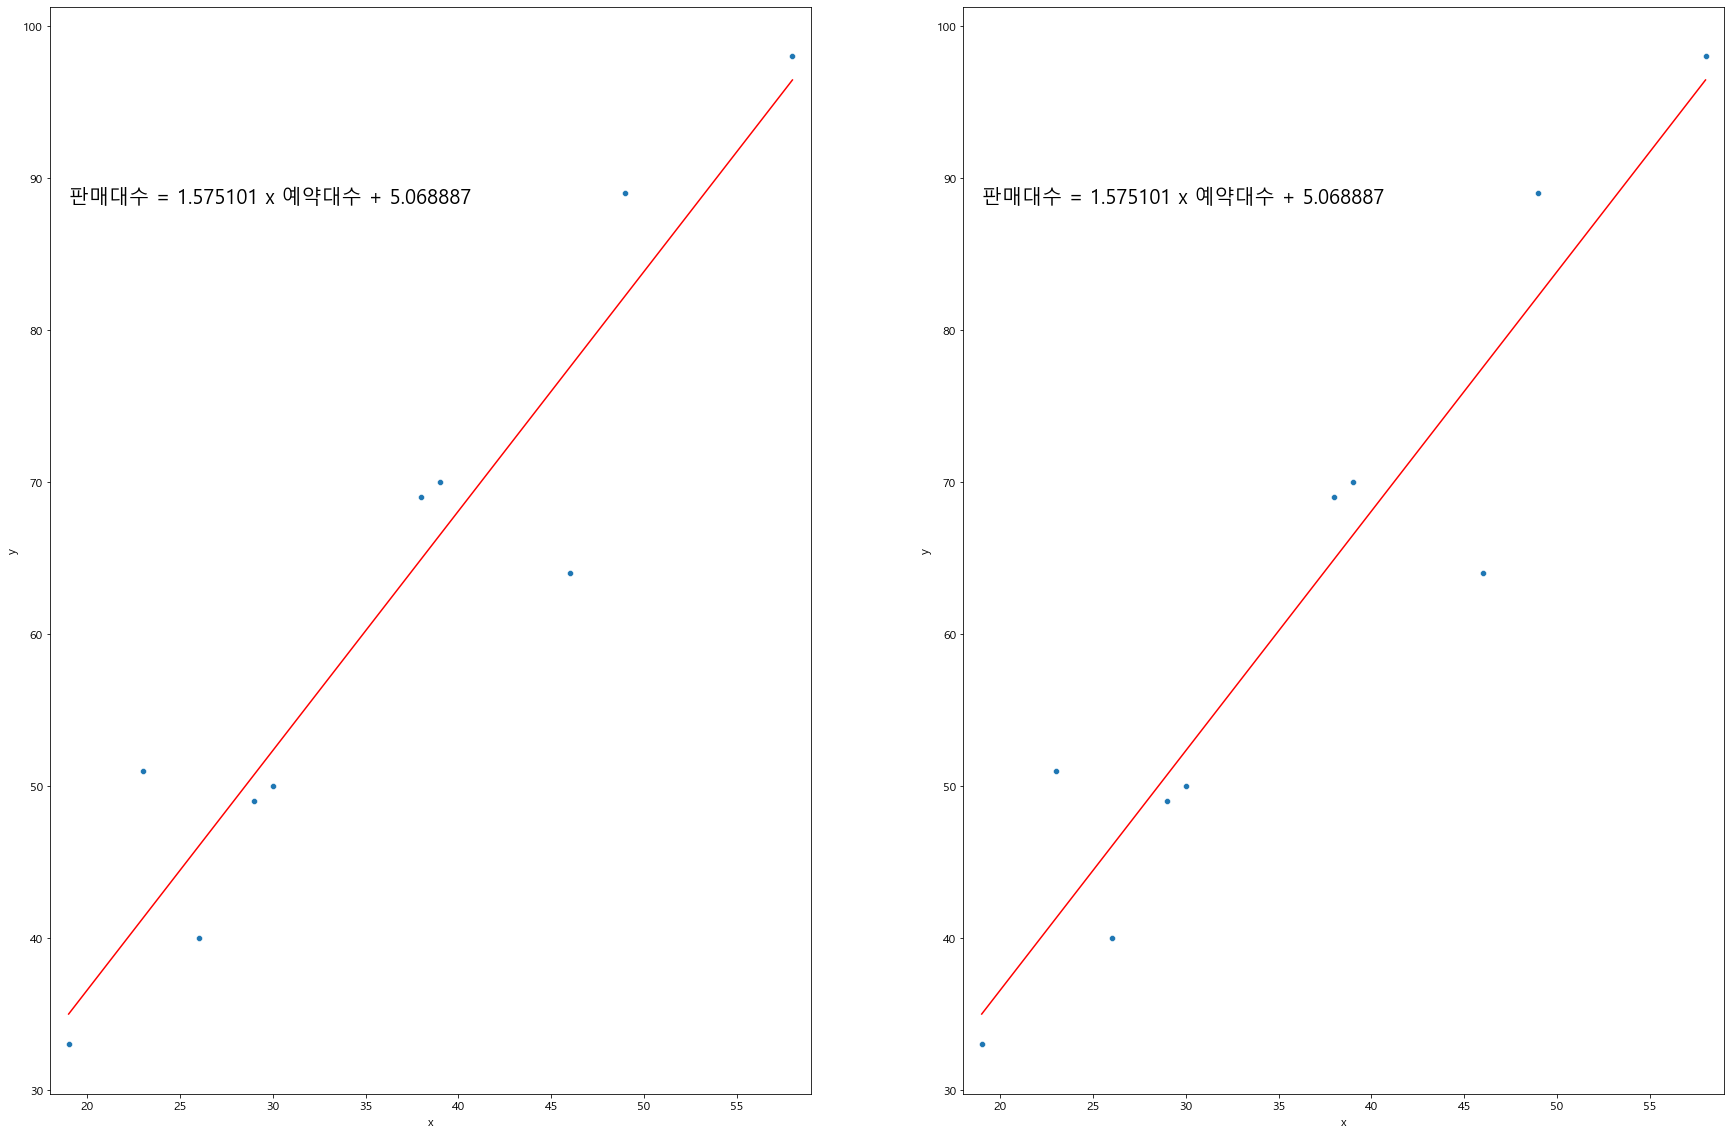

In [189]:
fig ,ax = plt.subplots(1,2,figsize = (30,20))

z = np.polyfit(df['x'], df['y'] , 1)
a, b = z
f = np.poly1d(z)

sns.scatterplot(x = 'x', y = 'y', data = df,ax = ax[0])
ax[0].plot(df['x'],f(df['x']),'#ff0000')
ax[0].set_xlim(df['x'].min()-1, df['x'].max()+1)

ax[0].text(df['x'].min(), df['y'].max()-10,
        '판매대수 = %f x 예약대수 + %f' %(a,b),
        fontsize = 20, color = 'black', 
         horizontalalignment='left', verticalalignment='bottom')

#--------------------------------------------------------------------

a = res.params.x
b = res.params.Intercept
f = np.poly1d(z)

sns.scatterplot(x = 'x', y = 'y', data = df,ax = ax[1])
ax[1].plot(df['x'],res.fittedvalues,'#ff0000')
ax[1].set_xlim(df['x'].min()-1, df['x'].max()+1)

ax[1].text(df['x'].min(), df['y'].max()-10,
        '판매대수 = %f x 예약대수 + %f' %(a,b),
        fontsize = 20, color = 'black', 
         horizontalalignment='left', verticalalignment='bottom')


## 문제5-7)

Text(100, 229.75896598252973, '판매대수 = 1.575101 x 예약대수 + 5.068887')

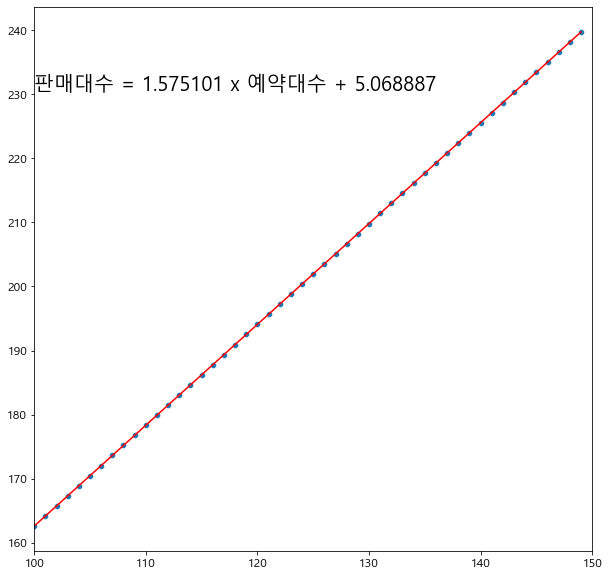

In [149]:
predict = res.predict({'x': list(range(100,150))})

a = res.params.x
b = res.params.Intercept
f = np.poly1d(z)

sns.scatterplot(x = list(range(100,150)), y = predict)
plt.plot(list(range(100,150)),predict,'#ff0000')
plt.xlim(100, 150)

plt.text(100, predict.max()-10,
        '판매대수 = %f x 예약대수 + %f' %(a,b),
        fontsize = 20, color = 'black', 
         horizontalalignment='left', verticalalignment='bottom')